**Logistic Regression:**

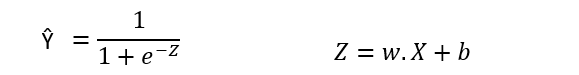

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

**Derivatives:**

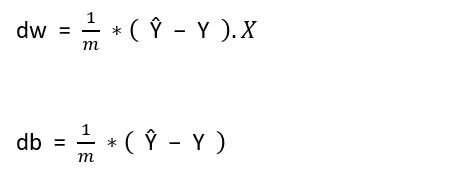

Importing the Dependencies

In [20]:
import numpy as np

**Logistic Regression**

In [21]:
class Logistic_Regression():
    def __init__(self , learning_rate , no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self , X , y):
        self.m , self.n = X.shape

        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.no_of_iterations):
            self.update_weights()
    def update_weights(self):
        y_hat = 1 / (1 + np.exp(- (self.X.dot(self.w)+self.b)))

        dw = (1/self.m)*np.dot(self.X.T , (y_hat - self.y))
        db = (1/self.m)*np.sum(y_hat - self.y)

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self , X):
        y_pred = 1/(1+np.exp(-(X.dot(self.w) + self.b)))
        y_pred = np.where(y_pred > 0.5 , 1 , 0)
        return y_pred

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [23]:
dataset = pd.read_csv('diabetes.csv')

In [24]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [25]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [27]:
classifier = Logistic_Regression(0.01 , 1000)
classifier.fit(X_train , y_train)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
accuracy_score(y_test , y_pred)

0.7662337662337663

In [30]:
accuracy_score(y_train , classifier.predict(X_train))

0.7768729641693811